In [ ]:
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from sklearn.metrics import mean_squared_error


%matplotlib inline

# Create dataset

In [ ]:
X = np.arange(0, 360)
y = np.sin(X*np.pi/10)
dataset = pd.DataFrame({"X": X, "y":y})
dataset = dataset.set_index("X")

It's always important to see what you are doing. You can save a lot of time like this ;)

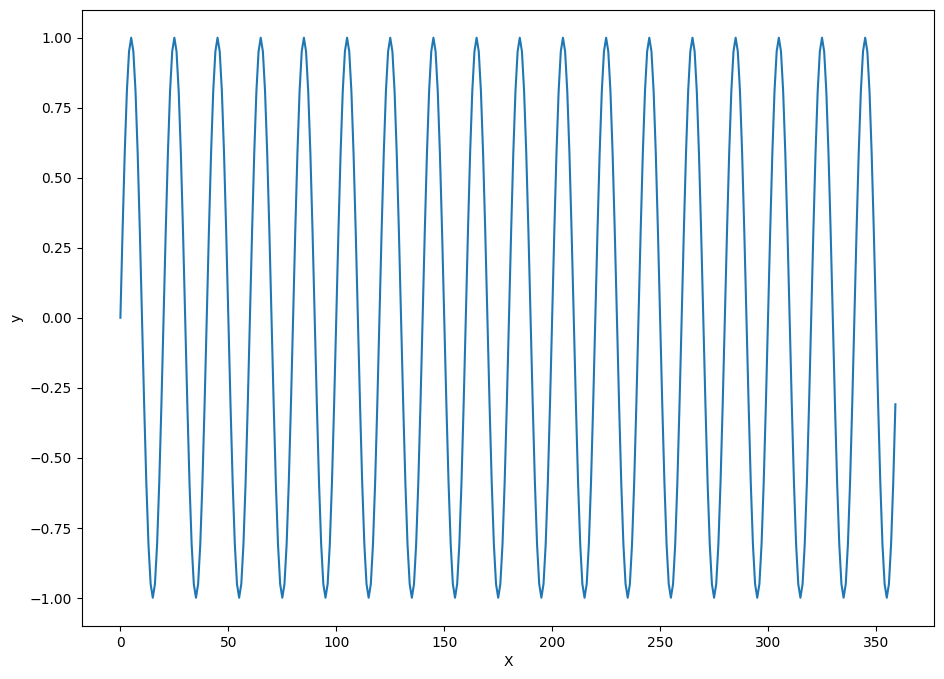

In [ ]:
plt.plot(dataset)
plt.xlabel('X')
plt.ylabel('y');
plt.gcf().set_size_inches(11,8)

## Training and Testing datasets
The y values are just the next x value

In [ ]:
values = dataset['y'].values.reshape(-1, 1)
X = values[:-1]
y = values[1:]

We'll be using the first 2/3 of the timeseries to train the model and the last 1/3 to evaluate it.

In [ ]:
n_points = len(values)
train_points = int(2/3*n_points)+1
X_train, X_test = X[:train_points], X[train_points:]
y_train, y_test = y[:train_points], y[train_points:]
print("We have", len(X_train), "training points and", X_test.shape[0], "testing points")

We have 241 training points and 118 testing points


The SimpleRNN model expects a 3D ([samples, time steps, features]) dataset so we reshape them accordingly

In [ ]:
#tf.reset_default_graph()
keras.backend.clear_session()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(241, 1, 1)
(118, 1, 1)


We're only using one timestep

## Define the model architecture.
We'll be using a SimpleRNN model with 4 hidden units. The Dense layer at the end has a linear activation function to aggregate the outputs of all the hidden units.

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
nb_epoch = 100

model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.1984
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1752
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1541
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1360
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1195
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1056
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0932
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0831
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0753
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0591
Epoch 13/100
8/8 [==============================] - 0s 3ms/st

## Make predictions

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


Compile the values

In [ ]:
dataset['RNN_train_predict'] = 0
dataset['RNN_test_predict'] = 0
dataset.loc[1:train_points, 'RNN_train_predict'] = y_train_pred
dataset.loc[train_points+1:, 'RNN_test_predict'] = y_test_pred

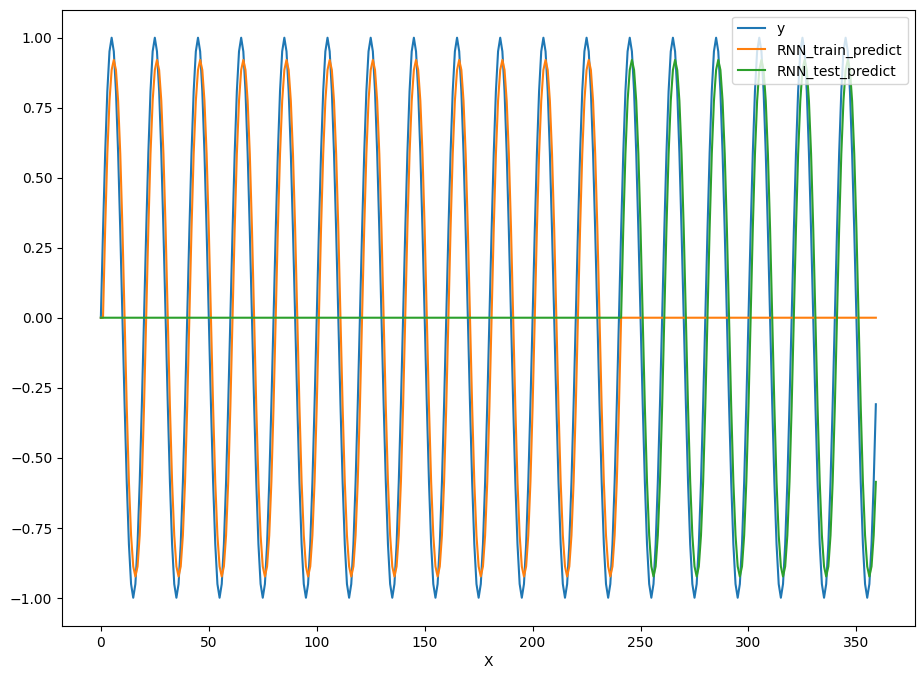

In [ ]:
dataset[['y', 'RNN_train_predict', 'RNN_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

# LSTM
Let's now try using a slightly more sophisticated architecture

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nb_epoch = 500

model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/500
8/8 [==============================] - 3s 3ms/step - loss: 0.5878
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5774
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5673
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5572
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5473
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5377
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5287
Epoch 8/500
8/8 [==============================] - 0s 4ms/step - loss: 0.5191
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5101
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5009
Epoch 11/500
8/8 [==============================] - 0s 4ms/step - loss: 0.4920
Epoch 12/500
8/8 [==============================] - 0s 3ms/step - loss: 0.4828
Epoch 13/500
8/8 [==============================] - 0s 3ms/st

Calculate the predicted values

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

dataset['LSTM_train_predict'] = 0
dataset['LSTM_test_predict'] = 0
dataset.loc[1:train_points, 'LSTM_train_predict'] = y_train_pred
dataset.loc[train_points+1:, 'LSTM_test_predict'] = y_test_pred

4/4 [==============================] - 0s 3ms/step


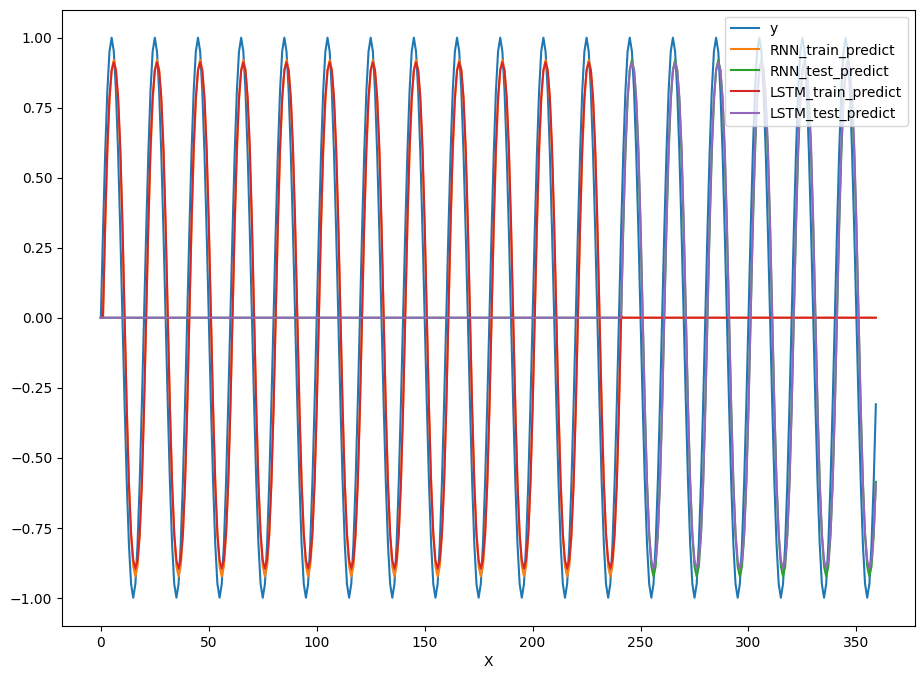

In [ ]:
dataset[['y', 'RNN_train_predict', 'RNN_test_predict', 'LSTM_train_predict', 'LSTM_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

# Multiple timesteps
So far we've been using architectures with just a single timestep. Now we'll see how we can use multiple timesteps (t-1, t) to predict the value at t+1. We'll keep the basic architecture of the system. We still have the raw data in memory, so we don't need to reload it. We just have to be careful when we build the inputs

In [ ]:
X2 = np.concatenate([X[0:-3], X[1:-2], X[2:-1]], axis=1)
y2 = X[3:]

X2_train, X2_test = X2[:train_points], X2[train_points:]
y2_train, y2_test = y2[:train_points], y2[train_points:]

print("We have", X2_train.shape[0], "training points and", X2_test.shape[0], "testing points")

We have 241 training points and 115 testing points


The more we increas the lag, the more points we lose! The rest of the code looks pretty much the same

In [ ]:
tf.reset_default_graph()
keras.backend.clear_session()

X2_train = X2_train.reshape(X2_train.shape[0], X2_train.shape[1], 1)
X2_test = X2_test.reshape(X2_test.shape[0], X2_test.shape[1], 1)
print(X2_train.shape)
print(X2_test.shape)

(241, 3, 1)
(115, 3, 1)


But now we see that the result is slightly different. For each of our examples, we now have 3 timesteps to consider. Now we just need to refine the model:

In [ ]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(X2_train.shape[1], X2_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nb_epoch = 500
model.fit(X2_train, y2_train, epochs=nb_epoch, shuffle=False)

Epoch 1/500
241/241 [==============================] - 3s 11ms/step - loss: 0.3614
Epoch 2/500
241/241 [==============================] - 0s 427us/step - loss: 0.3415
Epoch 3/500
241/241 [==============================] - 0s 384us/step - loss: 0.3225
Epoch 4/500
241/241 [==============================] - 0s 496us/step - loss: 0.3045
Epoch 5/500
241/241 [==============================] - 0s 432us/step - loss: 0.2875
Epoch 6/500
241/241 [==============================] - 0s 400us/step - loss: 0.2716
Epoch 7/500
241/241 [==============================] - 0s 394us/step - loss: 0.2567
Epoch 8/500
241/241 [==============================] - 0s 378us/step - loss: 0.2429
Epoch 9/500
241/241 [==============================] - 0s 401us/step - loss: 0.2302
Epoch 10/500
241/241 [==============================] - 0s 377us/step - loss: 0.2188
Epoch 11/500
241/241 [==============================] - 0s 396us/step - loss: 0.2088
Epoch 12/500
241/241 [==============================] - 0s 392us/step - los

241/241 [==============================] - 0s 343us/step - loss: 2.3223e-04
Epoch 97/500
241/241 [==============================] - 0s 391us/step - loss: 2.2772e-04
Epoch 98/500
241/241 [==============================] - 0s 342us/step - loss: 2.2347e-04
Epoch 99/500
241/241 [==============================] - 0s 416us/step - loss: 2.1946e-04
Epoch 100/500
241/241 [==============================] - 0s 464us/step - loss: 2.1566e-04
Epoch 101/500
241/241 [==============================] - 0s 446us/step - loss: 2.1205e-04
Epoch 102/500
241/241 [==============================] - 0s 461us/step - loss: 2.0861e-04
Epoch 103/500
241/241 [==============================] - 0s 421us/step - loss: 2.0531e-04
Epoch 104/500
241/241 [==============================] - 0s 385us/step - loss: 2.0215e-04
Epoch 105/500
241/241 [==============================] - 0s 390us/step - loss: 1.9911e-04
Epoch 106/500
241/241 [==============================] - 0s 421us/step - loss: 1.9617e-04
Epoch 107/500
241/241 [====

241/241 [==============================] - 0s 577us/step - loss: 6.3937e-05
Epoch 188/500
241/241 [==============================] - 0s 532us/step - loss: 6.3040e-05
Epoch 189/500
241/241 [==============================] - 0s 532us/step - loss: 6.2155e-05
Epoch 190/500
241/241 [==============================] - 0s 507us/step - loss: 6.1281e-05
Epoch 191/500
241/241 [==============================] - 0s 465us/step - loss: 6.0419e-05
Epoch 192/500
241/241 [==============================] - 0s 540us/step - loss: 5.9569e-05
Epoch 193/500
241/241 [==============================] - 0s 578us/step - loss: 5.8729e-05
Epoch 194/500
241/241 [==============================] - 0s 577us/step - loss: 5.7901e-05
Epoch 195/500
241/241 [==============================] - 0s 530us/step - loss: 5.7084e-05
Epoch 196/500
241/241 [==============================] - 0s 599us/step - loss: 5.6276e-05
Epoch 197/500
241/241 [==============================] - 0s 498us/step - loss: 5.5480e-05
Epoch 198/500
241/241 [=

241/241 [==============================] - 0s 465us/step - loss: 1.6462e-05
Epoch 279/500
241/241 [==============================] - 0s 515us/step - loss: 1.6225e-05
Epoch 280/500
241/241 [==============================] - 0s 554us/step - loss: 1.5991e-05
Epoch 281/500
241/241 [==============================] - 0s 620us/step - loss: 1.5762e-05
Epoch 282/500
241/241 [==============================] - 0s 575us/step - loss: 1.5537e-05
Epoch 283/500
241/241 [==============================] - 0s 484us/step - loss: 1.5316e-05
Epoch 284/500
241/241 [==============================] - 0s 492us/step - loss: 1.5099e-05
Epoch 285/500
241/241 [==============================] - 0s 538us/step - loss: 1.4886e-05
Epoch 286/500
241/241 [==============================] - 0s 600us/step - loss: 1.4677e-05
Epoch 287/500
241/241 [==============================] - 0s 583us/step - loss: 1.4472e-05
Epoch 288/500
241/241 [==============================] - 0s 557us/step - loss: 1.4271e-05
Epoch 289/500
241/241 [=

241/241 [==============================] - 0s 569us/step - loss: 6.7591e-06
Epoch 370/500
241/241 [==============================] - 0s 526us/step - loss: 6.7288e-06
Epoch 371/500
241/241 [==============================] - 0s 543us/step - loss: 6.6993e-06
Epoch 372/500
241/241 [==============================] - 0s 578us/step - loss: 6.6703e-06
Epoch 373/500
241/241 [==============================] - 0s 581us/step - loss: 6.6421e-06
Epoch 374/500
241/241 [==============================] - 0s 509us/step - loss: 6.6144e-06
Epoch 375/500
241/241 [==============================] - 0s 569us/step - loss: 6.5874e-06
Epoch 376/500
241/241 [==============================] - 0s 570us/step - loss: 6.5611e-06
Epoch 377/500
241/241 [==============================] - 0s 579us/step - loss: 6.5353e-06
Epoch 378/500
241/241 [==============================] - 0s 659us/step - loss: 6.5101e-06
Epoch 379/500
241/241 [==============================] - 0s 609us/step - loss: 6.4855e-06
Epoch 380/500
241/241 [=

241/241 [==============================] - 0s 546us/step - loss: 5.4862e-06
Epoch 461/500
241/241 [==============================] - 0s 561us/step - loss: 5.4792e-06
Epoch 462/500
241/241 [==============================] - 0s 548us/step - loss: 5.4722e-06
Epoch 463/500
241/241 [==============================] - 0s 581us/step - loss: 5.4652e-06
Epoch 464/500
241/241 [==============================] - 0s 595us/step - loss: 5.4583e-06
Epoch 465/500
241/241 [==============================] - 0s 599us/step - loss: 5.4513e-06
Epoch 466/500
241/241 [==============================] - 0s 628us/step - loss: 5.4443e-06
Epoch 467/500
241/241 [==============================] - 0s 595us/step - loss: 5.4376e-06
Epoch 468/500
241/241 [==============================] - 0s 524us/step - loss: 5.4307e-06
Epoch 469/500
241/241 [==============================] - 0s 565us/step - loss: 5.4239e-06
Epoch 470/500
241/241 [==============================] - 0s 507us/step - loss: 5.4171e-06
Epoch 471/500
241/241 [=

In [ ]:
y_train_pred = model.predict(X2_train)
y_test_pred = model.predict(X2_test)

dataset['LSTM3_train_predict'] = 0
dataset['LSTM3_test_predict'] = 0
dataset.loc[3:train_points+2, 'LSTM3_train_predict'] = y_train_pred
dataset.loc[train_points+4:, 'LSTM3_test_predict'] = y_test_pred

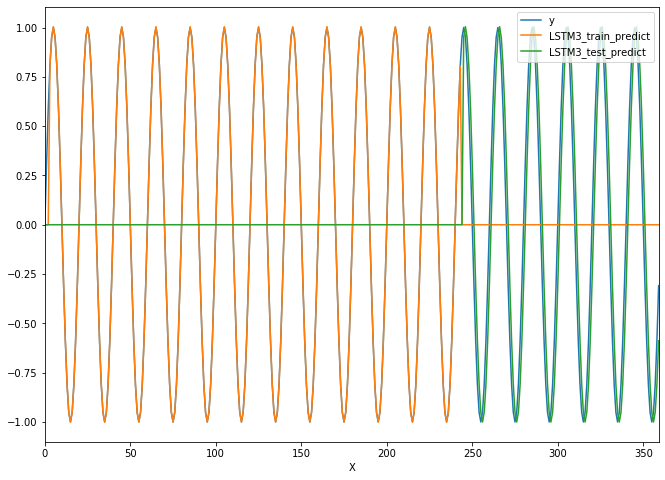

In [ ]:
dataset[['y', #'RNN_train_predict', 'RNN_test_predict',
                #'LSTM_train_predict', 'LSTM_test_predict',
                'LSTM3_train_predict', 'LSTM3_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

<div style="width: 100%; overflow: hidden;">
     <img src="https://github.com/DataForScience/RNN/blob/master/data/D4Sci_logo_full.png?raw=1" alt="Data For Science, Inc" align="center" border="0" width=300px>
</div>